In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
#arr: type numpy.array
def add_gauss_noise(arr, noise_scale, mut_type):
    gauss_noise =  np.random.normal(loc=0, scale=1, size=arr.shape)
    if mut_type == "input":
        noisy = (np.clip((arr/255 + gauss_noise * noise_scale),0,1) * 255).astype(np.int)  # dtype: int
    else:
        noisy = np.clip((arr + gauss_noise * noise_scale),0,1)    # dtype: float
        
    return noisy

In [5]:
# load model
model = tf.keras.models.load_model('./alexnet-cifar10_origin.h5')

# Input Mutation


In [6]:
# load datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
orig_x = np.array(x_train)
x_shape = tuple(orig_x.shape)

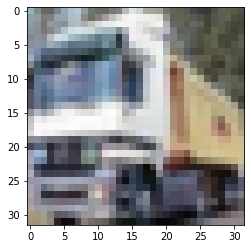

In [7]:
NTH_SAMPLE = 1
# show n-th instance of test samples
plt.imshow(orig_x[NTH_SAMPLE])

In [9]:
input_noise_scale = 0.5
noisy_x = add_gauss_noise(orig_x, input_noise_scale, "input")

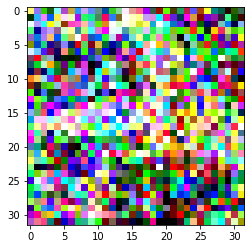

In [10]:
plt.imshow(noisy_x[NTH_SAMPLE])

# Weight Mutation

In [12]:
weight_noise_scale = 0.1
bias_noise_scale = 0.005
for layer in model.layers:
    weights = np.array(layer.get_weights()[0])
    biases = np.array(layer.get_weights()[1])
    
    print(weights[0][0][0])
    noisy_weights = add_gauss_noise(weights, weight_noise_scale, "weight")
    noisy_biases = add_gauss_noise(biases, bias_noise_scale, "bias")
    
    print(noisy_weights[0][0][0])
    layer.set_weights([noisy_weights, noisy_biases])
    break

[1.53361121e-03 2.44194418e-02 1.88408815e-03 0.00000000e+00
 4.24715783e-03 3.18760164e-02 0.00000000e+00 3.31698800e-03
 1.68759748e-02 0.00000000e+00 1.23761566e-02 4.96379025e-02
 0.00000000e+00 1.89252600e-01 6.24066666e-02 3.54676336e-01
 0.00000000e+00 2.21974333e-03 4.97515779e-03 0.00000000e+00
 1.61900163e-01 1.32065425e-02 1.59920439e-01 1.47204459e-01
 7.10328594e-02 0.00000000e+00 1.57825125e-03 2.96884496e-03
 2.09935429e-03 0.00000000e+00 0.00000000e+00 1.78670764e-01
 0.00000000e+00 3.77711584e-03 9.01211649e-02 6.72361553e-02
 5.17639285e-03 3.07369069e-03 9.65039898e-03 1.23346515e-03
 3.00458726e-02 4.53537423e-03 0.00000000e+00 5.53097436e-03
 3.39801167e-03 0.00000000e+00 1.38125767e-03 0.00000000e+00
 4.33264952e-03 1.03569161e-02 1.55876474e-02 9.63130407e-03
 0.00000000e+00 1.28926067e-02 0.00000000e+00 0.00000000e+00
 3.04569658e-02 0.00000000e+00 5.70777571e-03 9.56050761e-04
 6.48634508e-02 7.10057020e-02 1.12103289e-02 2.18399276e-04
 3.22839580e-02 0.000000